1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

## (A) Web Scrapping using BeautifulSoup

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
url="https://www.amazon.in/All-new-Echo-Dot/product-reviews/B084DWH53T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
code = requests.get(url)
code

<Response [200]>

In [ ]:
soup = BeautifulSoup(code.content,'html.parser')
print(soup.prettify())

<!DOCTYPE doctype html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41C-I1lXVwL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,

In [ ]:
star_rating = soup.select('i.review-rating span.a-icon-alt')[2:]
star_rating

[<span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">3.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>]

In [13]:
len(star_rating)

10

In [14]:
reviews = soup.select('span.review-text-content span')
reviews

[<span>I got this 4th gen echo dot with smart bulb combo for 1900/- during Prime day sale. I have purchased this device mainly for FM reception. I don’t have better FM signals near my area and since Echo has online FM radio service and hence I have opted for this. It has inbuilt AIR (All India Radio) skill using which we can listen to all regional channels of AIR. Unfortunately, there are NO other regional FM stations (such as Radio Mirchi Telugu, RED FM Telugu, Radio City  Telugu or BIG FM). If they include these regional FM stations, then it would have been much better. Sound quality is also great for the compact size it comes in.</span>,
 <span>This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot. That being said this has tons of functionality just like its more expensive counterpart , the Echo but with significantly cut down sound quality. Ive divided the review into sections :<br/><br/>Build and 

In [15]:
len(reviews)

10

In [16]:
ratings = []
rev_content = []
for i in range(len(star_rating)):
    ratings.append(star_rating[i].get_text())
    rev_content.append(reviews[i].get_text().strip("\n "))

In [17]:
rev_content

['I got this 4th gen echo dot with smart bulb combo for 1900/- during Prime day sale. I have purchased this device mainly for FM reception. I don’t have better FM signals near my area and since Echo has online FM radio service and hence I have opted for this. It has inbuilt AIR (All India Radio) skill using which we can listen to all regional channels of AIR. Unfortunately, there are NO other regional FM stations (such as Radio Mirchi Telugu, RED FM Telugu, Radio City  Telugu or BIG FM). If they include these regional FM stations, then it would have been much better. Sound quality is also great for the compact size it comes in.',
 'This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot. That being said this has tons of functionality just like its more expensive counterpart , the Echo but with significantly cut down sound quality. Ive divided the review into sections :Build and Aesthetics : This speaker 

In [18]:
review_df = pd.DataFrame()
review_df['Ratings'] = ratings
review_df['Reviews'] = rev_content
review_df.describe

<bound method NDFrame.describe of               Ratings                                            Reviews
0  4.0 out of 5 stars  I got this 4th gen echo dot with smart bulb co...
1  3.0 out of 5 stars  This smart speaker is one of the cheapest ones...
2  5.0 out of 5 stars  I have purchased this for my father who is bli...
3  4.0 out of 5 stars  LikeHands free musicGets the commandI just wis...
4  4.0 out of 5 stars               Voice.  Is.  Very.  Very.  Good....🤗
5  4.0 out of 5 stars  This new 4th Gen Echo Dot brings a new spheric...
6  4.0 out of 5 stars                                      Alexa is cool
7  4.0 out of 5 stars                                               good
8  4.0 out of 5 stars  Product is really good but not useful as much ...
9  4.0 out of 5 stars  Ever since it arrived, it has become a new mem...>

## (B)Text Mining

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


preprocessing

In [20]:
review_df=[Reviews.strip() for Reviews in review_df.Reviews] 
review_df=[Reviews for Reviews in review_df if Reviews] 
review_df

['I got this 4th gen echo dot with smart bulb combo for 1900/- during Prime day sale. I have purchased this device mainly for FM reception. I don’t have better FM signals near my area and since Echo has online FM radio service and hence I have opted for this. It has inbuilt AIR (All India Radio) skill using which we can listen to all regional channels of AIR. Unfortunately, there are NO other regional FM stations (such as Radio Mirchi Telugu, RED FM Telugu, Radio City  Telugu or BIG FM). If they include these regional FM stations, then it would have been much better. Sound quality is also great for the compact size it comes in.',
 'This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot. That being said this has tons of functionality just like its more expensive counterpart , the Echo but with significantly cut down sound quality. Ive divided the review into sections :Build and Aesthetics : This speaker 

In [21]:
# Joining the list into one string/text
reviews_text=' '.join(review_df)
reviews_text

'I got this 4th gen echo dot with smart bulb combo for 1900/- during Prime day sale. I have purchased this device mainly for FM reception. I don’t have better FM signals near my area and since Echo has online FM radio service and hence I have opted for this. It has inbuilt AIR (All India Radio) skill using which we can listen to all regional channels of AIR. Unfortunately, there are NO other regional FM stations (such as Radio Mirchi Telugu, RED FM Telugu, Radio City  Telugu or BIG FM). If they include these regional FM stations, then it would have been much better. Sound quality is also great for the compact size it comes in. This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot. That being said this has tons of functionality just like its more expensive counterpart , the Echo but with significantly cut down sound quality. Ive divided the review into sections :Build and Aesthetics : This speaker is bu

In [22]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I got this 4th gen echo dot with smart bulb combo for 1900 during Prime day sale I have purchased this device mainly for FM reception I don’t have better FM signals near my area and since Echo has online FM radio service and hence I have opted for this It has inbuilt AIR All India Radio skill using which we can listen to all regional channels of AIR Unfortunately there are NO other regional FM stations such as Radio Mirchi Telugu RED FM Telugu Radio City  Telugu or BIG FM If they include these regional FM stations then it would have been much better Sound quality is also great for the compact size it comes in This smart speaker is one of the cheapest ones in the industry  the cheapest uptodate smart speaker if you exclude the 3rd gen echodot That being said this has tons of functionality just like its more expensive counterpart  the Echo but with significantly cut down sound quality Ive divided the review into sections Build and Aesthetics  This speaker is built surprisingly well with

In [23]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'got', 'this', '4th', 'gen', 'echo', 'dot', 'with', 'smart', 'bulb', 'combo', 'for', '1900', 'during', 'Prime', 'day', 'sale', 'I', 'have', 'purchased', 'this', 'device', 'mainly', 'for', 'FM', 'reception', 'I', 'don', '’', 't', 'have', 'better', 'FM', 'signals', 'near', 'my', 'area', 'and', 'since', 'Echo', 'has', 'online', 'FM', 'radio', 'service', 'and', 'hence', 'I', 'have', 'opted']


In [25]:
len(text_tokens)

949

In [26]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['got', '4th', 'gen', 'echo', 'dot', 'smart', 'bulb', 'combo', '1900', 'Prime', 'day', 'sale', 'purchased', 'device', 'mainly', 'FM', 'reception', '’', 'better', 'FM', 'signals', 'near', 'area', 'since', 'Echo', 'online', 'FM', 'radio', 'service', 'hence', 'opted', 'inbuilt', 'AIR', 'All', 'India', 'Radio', 'skill', 'using', 'listen', 'regional', 'channels', 'AIR', 'Unfortunately', 'NO', 'regional', 'FM', 'stations', 'Radio', 'Mirchi', 'Telugu', 'RED', 'FM', 'Telugu', 'Radio', 'City', 'Telugu', 'BIG', 'FM', 'If', 'include', 'regional', 'FM', 'stations', 'would', 'much', 'better', 'Sound', 'quality', 'also', 'great', 'compact', 'size', 'comes', 'This', 'smart', 'speaker', 'one', 'cheapest', 'ones', 'industry', 'cheapest', 'uptodate', 'smart', 'speaker', 'exclude', '3rd', 'gen', 'echodot', 'That', 'said', 'tons', 'functionality', 'like', 'expensive', 'counterpart', 'Echo', 'significantly', 'cut', 'sound', 'quality', 'Ive', 'divided', 'review', 'sections', 'Build', 'Aesthetics', 'This', '

In [27]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['got', '4th', 'gen', 'echo', 'dot', 'smart', 'bulb', 'combo', '1900', 'prime', 'day', 'sale', 'purchased', 'device', 'mainly', 'fm', 'reception', '’', 'better', 'fm', 'signals', 'near', 'area', 'since', 'echo', 'online', 'fm', 'radio', 'service', 'hence', 'opted', 'inbuilt', 'air', 'all', 'india', 'radio', 'skill', 'using', 'listen', 'regional', 'channels', 'air', 'unfortunately', 'no', 'regional', 'fm', 'stations', 'radio', 'mirchi', 'telugu', 'red', 'fm', 'telugu', 'radio', 'city', 'telugu', 'big', 'fm', 'if', 'include', 'regional', 'fm', 'stations', 'would', 'much', 'better', 'sound', 'quality', 'also', 'great', 'compact', 'size', 'comes', 'this', 'smart', 'speaker', 'one', 'cheapest', 'ones', 'industry', 'cheapest', 'uptodate', 'smart', 'speaker', 'exclude', '3rd', 'gen', 'echodot', 'that', 'said', 'tons', 'functionality', 'like', 'expensive', 'counterpart', 'echo', 'significantly', 'cut', 'sound', 'quality', 'ive', 'divided', 'review', 'sections', 'build', 'aesthetics', 'this', '

In [28]:
# Word Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['got', '4th', 'gen', 'echo', 'dot', 'smart', 'bulb', 'combo', '1900', 'prime', 'day', 'sale', 'purchas', 'devic', 'mainli', 'fm', 'recept', '’', 'better', 'fm', 'signal', 'near', 'area', 'sinc', 'echo', 'onlin', 'fm', 'radio', 'servic', 'henc', 'opt', 'inbuilt', 'air', 'all', 'india', 'radio', 'skill', 'use', 'listen', 'region', 'channel', 'air', 'unfortun', 'no', 'region', 'fm', 'station', 'radio', 'mirchi', 'telugu', 'red', 'fm', 'telugu', 'radio', 'citi', 'telugu', 'big', 'fm', 'if', 'includ', 'region', 'fm', 'station', 'would', 'much', 'better', 'sound', 'qualiti', 'also', 'great', 'compact', 'size', 'come', 'thi', 'smart', 'speaker', 'one', 'cheapest', 'one', 'industri', 'cheapest', 'uptod', 'smart', 'speaker', 'exclud', '3rd', 'gen', 'echodot', 'that', 'said', 'ton', 'function', 'like', 'expens', 'counterpart', 'echo', 'significantli', 'cut', 'sound', 'qualiti', 'ive', 'divid', 'review', 'section', 'build', 'aesthet', 'thi', 'speaker', 'built', 'surprisingli', 'well', 'good', 'a

In [29]:
# Word Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

got 4th gen echo dot smart bulb combo 1900 prime day sale purchased device mainly fm reception ’ better fm signals near area since echo online fm radio service hence opted inbuilt air all india radio skill using listen regional channels air unfortunately no regional fm stations radio mirchi telugu red fm telugu radio city telugu big fm if include regional fm stations would much better sound quality also great compact size comes this smart speaker one cheapest ones industry cheapest uptodate smart speaker exclude 3rd gen echodot that said tons functionality like expensive counterpart echo significantly cut sound quality ive divided review sections build aesthetics this speaker built surprisingly well good amount weight feels dense reassuring base completely made rubber provides good grip almost kinds surfaces aesthetics subjective basically sphere blends space making seldom noticeable making perfect minimalistic setup ring light surprisingly well done good upgrade last gen led hotspots 

In [30]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['get', '4th', 'gen', 'echo', 'dot', 'smart', 'bulb', 'combo', '1900', 'prime', 'day', 'sale', 'purchase', 'device', 'mainly', 'fm', 'reception', "'", 'well', 'fm', 'signal', 'near', 'area', 'since', 'echo', 'online', 'fm', 'radio', 'service', 'hence', 'opt', 'inbuilt', 'air', 'all', 'india', 'radio', 'skill', 'use', 'listen', 'regional', 'channel', 'air', 'unfortunately', 'no', 'regional', 'fm', 'station', 'radio', 'mirchi', 'telugu', 'red', 'fm', 'telugu', 'radio', 'city', 'telugu', 'big', 'fm', 'if', 'include', 'regional', 'fm', 'station', 'would', 'much', 'well', 'sound', 'quality', 'also', 'great', 'compact', 'size', 'come', 'this', 'smart', 'speaker', 'one', 'cheap', 'one', 'industry', 'cheap', 'uptodate', 'smart', 'speaker', 'exclude', '3rd', 'gen', 'echodot', 'that', 'say', 'ton', 'functionality', 'like', 'expensive', 'counterpart', 'echo', 'significantly', 'cut', 'sound', 'quality', 'I', 've', 'divide', 'review', 'section', 'build', 'aesthetic', 'this', 'speaker', 'build', 'su

In [31]:
clean_reviews=' '.join(lemmas)
clean_reviews

"get 4th gen echo dot smart bulb combo 1900 prime day sale purchase device mainly fm reception ' well fm signal near area since echo online fm radio service hence opt inbuilt air all india radio skill use listen regional channel air unfortunately no regional fm station radio mirchi telugu red fm telugu radio city telugu big fm if include regional fm station would much well sound quality also great compact size come this smart speaker one cheap one industry cheap uptodate smart speaker exclude 3rd gen echodot that say ton functionality like expensive counterpart echo significantly cut sound quality I ve divide review section build aesthetic this speaker build surprisingly well good amount weight feel dense reassuring base completely make rubber provide good grip almost kind surface aesthetic subjective basically sphere blend space make seldom noticeable make perfect minimalistic setup ring light surprisingly well do good upgrade last gen lead hotspot obvious gen 3 echo dot make look eve

Feature Extraction


1.Count Vectroizer

In [32]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [33]:
print(cv.vocabulary_)

{'get': 136, '4th': 3, 'gen': 135, 'echo': 106, 'dot': 104, 'smart': 281, 'bulb': 60, 'combo': 69, '1900': 1, 'prime': 234, 'day': 89, 'sale': 262, 'purchase': 239, 'device': 98, 'mainly': 186, 'fm': 127, 'reception': 247, 'well': 329, 'signal': 273, 'near': 205, 'area': 32, 'since': 275, 'online': 214, 'radio': 243, 'service': 268, 'hence': 144, 'opt': 215, 'inbuilt': 156, 'air': 15, 'all': 18, 'india': 158, 'skill': 278, 'use': 316, 'listen': 178, 'regional': 250, 'channel': 63, 'unfortunately': 313, 'no': 208, 'station': 289, 'mirchi': 195, 'telugu': 299, 'red': 249, 'city': 68, 'big': 49, 'if': 151, 'include': 157, 'would': 336, 'much': 201, 'sound': 282, 'quality': 241, 'also': 21, 'great': 138, 'compact': 73, 'size': 277, 'come': 70, 'this': 305, 'speaker': 285, 'one': 213, 'cheap': 65, 'industry': 159, 'uptodate': 315, 'exclude': 116, '3rd': 2, 'echodot': 107, 'that': 302, 'say': 264, 'ton': 310, 'functionality': 134, 'like': 175, 'expensive': 117, 'counterpart': 84, 'significan

In [34]:
print(cv.get_feature_names_out()[50:100])

['blend' 'blind' 'blue' 'bluetooth' 'book' 'bottom' 'bright' 'brightness'
 'bring' 'build' 'bulb' 'button' 'chamber' 'channel' 'characteristic'
 'cheap' 'choice' 'choose' 'city' 'combo' 'come' 'command' 'commandi'
 'compact' 'completely' 'condition' 'connect' 'connection' 'connectivity'
 'consider' 'considerably' 'cool' 'corner' 'could' 'counterpart' 'couple'
 'cut' 'daily' 'dark' 'day' 'decent' 'decently' 'definitely' 'delay'
 'dense' 'depend' 'deteriorate' 'develop' 'device' 'dim']


In [35]:
print(reviewscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
print(reviewscv.toarray().shape)

(559, 339)


2.Count Vectorizer with N-grams(Trigrams and Bigrams)

In [37]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [37]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

3. TF-IDF Vectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [39]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['16', '1900', '3rd', '4th', '50', '60', '70', 'aarti', 'able', 'absolutely', 'access', 'accord', 'actually', 'adjust', 'aesthetic', 'air', 'alexa', 'alexas', 'all', 'almost', 'along', 'also', 'amazing', 'amazon', 'ambient', 'amount', 'annoy', 'another', 'antenna', 'anymore', 'apart', 'app', 'area', 'arrive', 'atrocious', 'audible', 'audiobook', 'available', 'average', 'away', 'bag', 'ball', 'barscome', 'base', 'basically', 'be', 'become', 'behind', 'bhajan', 'big', 'blend', 'blind', 'blue', 'bluetooth', 'book', 'bottom', 'bright', 'brightness', 'bring', 'build', 'bulb', 'button', 'chamber', 'channel', 'characteristic', 'cheap', 'choice', 'choose', 'city', 'combo', 'come', 'command', 'commandi', 'compact', 'completely', 'condition', 'connect', 'connection', 'connectivity', 'consider', 'considerably', 'cool', 'corner', 'could', 'counterpart', 'couple', 'cut', 'daily', 'dark', 'day', 'decent', 'decently', 'definitely', 'delay', 'dense', 'depend', 'deteriorate', 'develop', 'device', 'dim'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud Generation

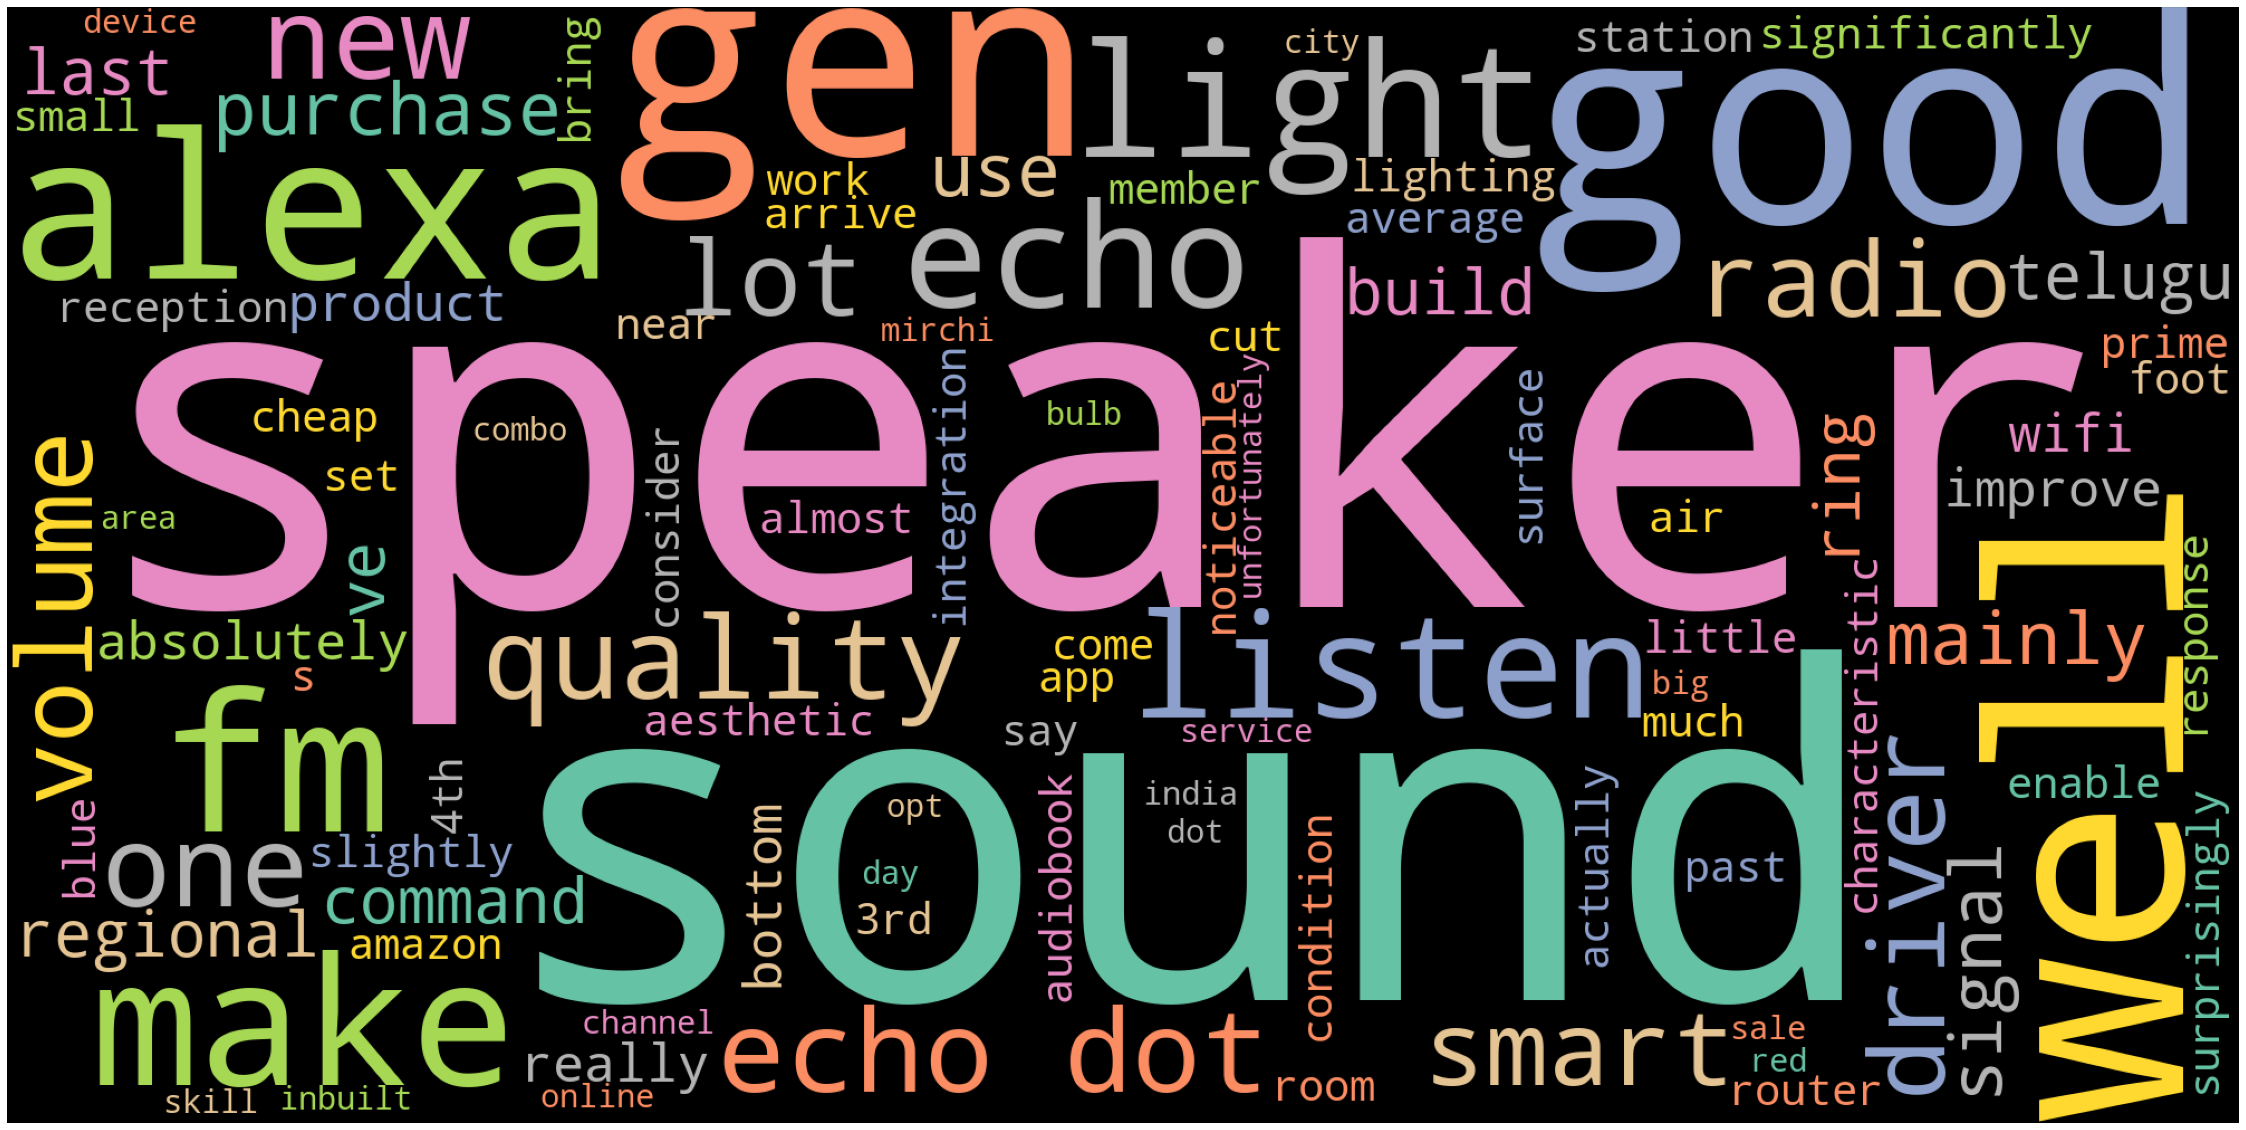

In [46]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=2000,height=1000,background_color='black',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

Named Entity Recoginition

In [47]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [48]:
for token in doc_block[100:200]:
    print(token,token.pos_)

I PRON
ve AUX
divide VERB
review NOUN
section NOUN
build VERB
aesthetic ADJ
this DET
speaker NOUN
build VERB
surprisingly ADV
well ADV
good ADJ
amount NOUN
weight NOUN
feel VERB
dense ADJ
reassuring ADJ
base NOUN
completely ADV
make VERB
rubber NOUN
provide VERB
good ADJ
grip NOUN
almost ADV
kind ADV
surface VERB
aesthetic ADJ
subjective ADJ
basically ADV
sphere ADJ
blend PROPN
space NOUN
make VERB
seldom ADV
noticeable ADJ
make VERB
perfect ADJ
minimalistic ADJ
setup NOUN
ring NOUN
light NOUN
surprisingly ADV
well ADV
do VERB
good ADJ
upgrade VERB
last ADJ
gen PROPN
lead VERB
hotspot ADJ
obvious ADJ
gen PROPN
3 NUM
echo NOUN
dot NOUN
make VERB
look VERB
ever ADV
slightly ADV
well ADV
ring NOUN
light NOUN
adjust VERB
brightness NOUN
accord NOUN
ambient ADJ
lighting NOUN
condition NOUN
get VERB
bright ADJ
harsh ADJ
lighting NOUN
condition NOUN
also ADV
dim VERB
enough ADJ
dark ADJ
room NOUN
eyepiercingalexa PROPN
integration NOUN
alexa ADP
integration NOUN
do AUX
excellently ADV
well AD

In [49]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['say', 'placement', 'speaker', 'microphone', 'place', 'button', 'locate', 'speaker', 'consider', 'driver', 'fire', 'problem', 'arrive', 'set', 'volume', 'struggle', 'pickup', 'command', 'depend', 'play', 'moment', 'response', 'time', 'speaker', 'command', 'consider', 'internet', 'connection', 'speak', 'connectivity', 'find', 'wifi', 'reception', 'speaker', 'teardown', 'video', 'reveal', 'wifi', 'antenna', 'have', 'router', 'room', 'couple', 'foot', 'result', 'signal', 'loss', 'wifi', 'router', 'lie', 'foot', 'speaker', 'app', 'report', 'signal', 'strength', 'barscome', 'part', 'sound', 'speaker', 'sound', 'experience', 'come', 'build', 'chamber', 'modify', 'owe', 'improve', 'quality', 'pyramidish', 'volume', 'sound', 'volume', 'sound', 'quality', 'deteriorate', 'volume', 'set', 'amazon', 'improve', 'driver', 's', 'dolby', 'power', 'echo', 'connect', 'speaker', 'improve', 'sound', 'bring', 'host', 'issue', 'annoy', 'command', 'purchase', 'father', 'purchase', 'fun', 'listen', 'listen']

In [50]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,speaker,10
1,echo,7
2,make,6
3,listen,5
4,quality,5
5,sound,5
6,light,4
7,dot,4
8,lot,4
9,volume,4


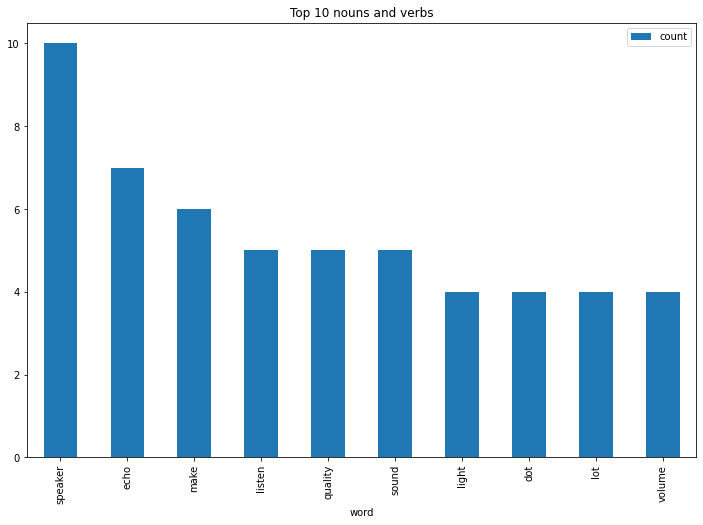

In [51]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

(C) Emotion Mining

In [52]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review_df))
sentences

['I got this 4th gen echo dot with smart bulb combo for 1900/- during Prime day sale.',
 'I have purchased this device mainly for FM reception.',
 'I don’t have better FM signals near my area and since Echo has online FM radio service and hence I have opted for this.',
 'It has inbuilt AIR (All India Radio) skill using which we can listen to all regional channels of AIR.',
 'Unfortunately, there are NO other regional FM stations (such as Radio Mirchi Telugu, RED FM Telugu, Radio City  Telugu or BIG FM).',
 'If they include these regional FM stations, then it would have been much better.',
 'Sound quality is also great for the compact size it comes in.',
 'This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot.',
 'That being said this has tons of functionality just like its more expensive counterpart , the Echo but with significantly cut down sound quality.',
 'Ive divided the review into sections :Buil

In [53]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I got this 4th gen echo dot with smart bulb co...
1,I have purchased this device mainly for FM rec...
2,I don’t have better FM signals near my area an...
3,It has inbuilt AIR (All India Radio) skill usi...
4,"Unfortunately, there are NO other regional FM ..."
5,"If they include these regional FM stations, th..."
6,Sound quality is also great for the compact si...
7,This smart speaker is one of the cheapest ones...
8,That being said this has tons of functionality...
9,Ive divided the review into sections :Build an...


In [55]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [57]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [58]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [62]:
# manual testing
calculate_sentiment(text='calm')

2

In [60]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      1
1      0
2      0
3      0
4     -1
5      0
6      3
7      1
8      1
9      3
10     2
11     5
12     3
13     3
14     0
15     1
16    -1
17    -2
18     0
19     0
20     1
21     2
22    -4
23    -2
24     2
25    -3
26     0
27    -3
28     2
29     0
30     2
31     0
32     3
33     0
34     4
35    -1
36    -1
37     7
38     0
39     0
40     0
41     2
42     1
43     2
44     0
45     0
46     0
47     3
48     0
49     0
50     3
51     0
52     7
53    12
54    -2
Name: sentiment_value, dtype: int64

In [61]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     17
1      9
2     24
3     19
4     22
5     14
6     12
7     25
8     24
9     24
10     5
11    18
12    24
13    15
14    21
15    10
16    33
17    15
18     9
19     8
20    20
21    39
22    21
23    15
24    27
25    22
26    10
27    19
28    45
29    20
30    20
31     7
32    17
33    10
34    19
35    27
36    10
37    20
38    13
39    28
40    20
41     7
42    11
43    24
44     1
45     1
46     1
47    17
48    25
49     8
50    10
51    17
52    16
53    34
54     9
Name: word_count, dtype: int64

In [63]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
22,This has been done considering the driver is f...,-4,21
27,Having your router in the same room but a coup...,-3,19
25,"Speaking of connectivity, here's a quirk i fo...",-3,22
23,It will most definitely struggle to pick-up co...,-2,15
17,No corners have been cut inspite of this being...,-2,15
54,Its useless if you are not a prime member.,-2,9
35,You can connect a bluetooth speaker for improv...,-1,27
16,It gets very bright in harsh lighting conditio...,-1,33
4,"Unfortunately, there are NO other regional FM ...",-1,22
36,I have purchased this for my father who is blind.,-1,10


In [64]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    55.000000
mean      1.018182
std       2.628131
min      -4.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      12.000000
Name: sentiment_value, dtype: float64

In [65]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I got this 4th gen echo dot with smart bulb co...,1,17
6,Sound quality is also great for the compact si...,3,12
7,This smart speaker is one of the cheapest ones...,1,25
8,That being said this has tons of functionality...,1,24
9,Ive divided the review into sections :Build an...,3,24
10,It feels dense and reassuring.,2,5
11,The base is completely made out of rubber whic...,5,18
12,Aesthetics is subjective but this basically be...,3,24
13,The Ring Light is surprisingly well done and a...,3,15
15,The ring light adjusts brightness according to...,1,10


In [66]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,I have purchased this device mainly for FM rec...,0,9
2,I don’t have better FM signals near my area an...,0,24
3,It has inbuilt AIR (All India Radio) skill usi...,0,19
4,"Unfortunately, there are NO other regional FM ...",-1,22
5,"If they include these regional FM stations, th...",0,14
14,LED hotspots are not as obvious as on the gen ...,0,21
16,It gets very bright in harsh lighting conditio...,-1,33
17,No corners have been cut inspite of this being...,-2,15
18,The alexa app has been done decently well too.,0,9
19,Lots os music streaming platforms to choose from.,0,8


In [67]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I got this 4th gen echo dot with smart bulb co...,1,17,0
1,I have purchased this device mainly for FM rec...,0,9,1
2,I don’t have better FM signals near my area an...,0,24,2
3,It has inbuilt AIR (All India Radio) skill usi...,0,19,3
4,"Unfortunately, there are NO other regional FM ...",-1,22,4
5,"If they include these regional FM stations, th...",0,14,5
6,Sound quality is also great for the compact si...,3,12,6
7,This smart speaker is one of the cheapest ones...,1,25,7
8,That being said this has tons of functionality...,1,24,8
9,Ive divided the review into sections :Build an...,3,24,9


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


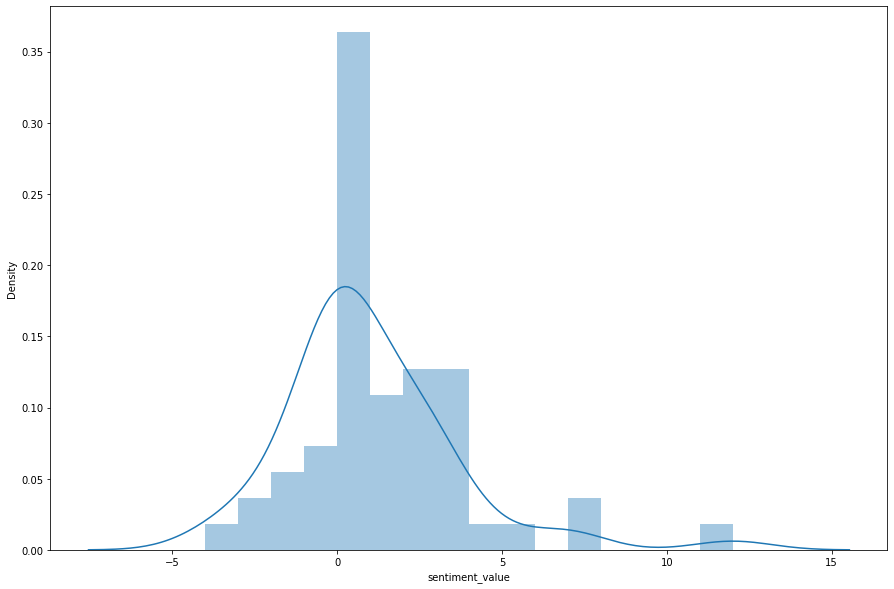

In [68]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

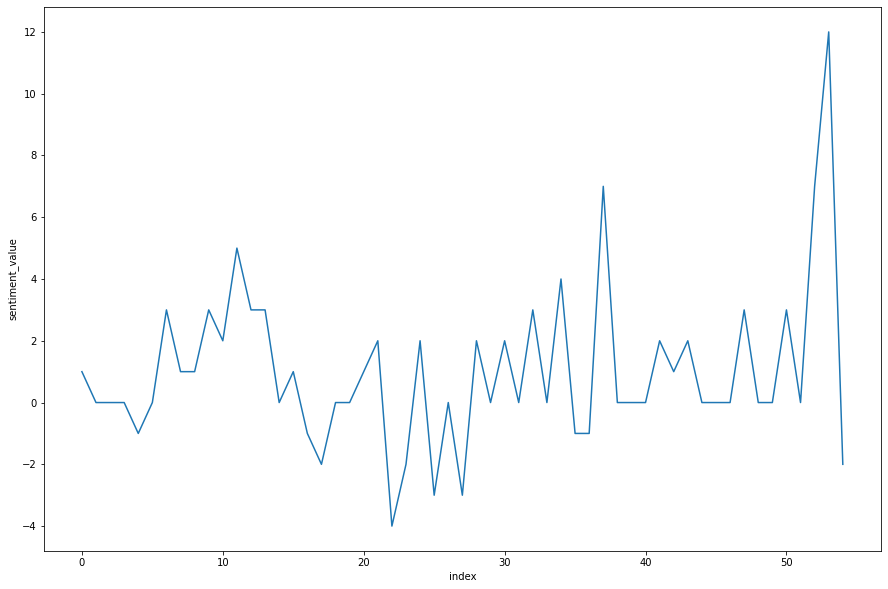

In [69]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)